In [35]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import NuSVR
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, StandardScaler, OneHotEncoder,RobustScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
df_brut =  pd.read_csv("SeoulBikeData.csv", encoding="latin1", sep = ',')

df_brut.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [37]:
np.unique(df_brut["Humidity(%)"])

array([ 0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98], dtype=int64)

In [38]:
print("Shape of the DataFrame:", df_brut.shape)

Shape of the DataFrame: (8760, 14)


In [39]:
df_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Data Pre-processing

In [40]:
# We convert Dtype of Date column to Datetime

df_brut['Date'] = pd.to_datetime(df_brut['Date'], format='%d/%m/%Y')
print(df_brut['Date'].dtype)

datetime64[ns]


In [41]:
df_brut.describe().T 

,count,mean,min,25%,50%,75%,max,std
Date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
Rented Bike Count,8760.0,704.602055,0.0,191.0,504.5,1065.25,3556.0,644.997468
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Temperature(°C),8760.0,12.882922,-17.8,3.5,13.7,22.5,39.4,11.944825
Humidity(%),8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
Wind speed (m/s),8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
Visibility (10m),8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
Dew point temperature(°C),8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.2,13.060369
Solar Radiation (MJ/m2),8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
Rainfall(mm),8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


In [42]:
missing_values = df_brut.isnull().sum()
print("\nTotal missing values in each column:")
print(missing_values)


Total missing values in each column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [43]:
# We check for duplicate rows
duplicates = df_brut.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


## Encoding

In [44]:
# We create a new column with numerical values corresponding to Seasons column then the same for holiday


encoded_seasons = pd.get_dummies(df_brut['Seasons'], prefix='Season')
encoded_holiday= pd.get_dummies(df_brut['Holiday'],prefix='Holiday')


Functioning_mapping={'Yes':1,'No':0}
df_brut['Functioning Day_Int']=df_brut['Functioning Day'].replace(Functioning_mapping)


df_brut['Day']=df_brut['Date'].dt.day
df_brut['Month']=df_brut['Date'].dt.month
df_brut['Year']=df_brut['Date'].dt.year
df_brut.drop(columns=['Date'],inplace=True)
df_brut = pd.concat([df_brut, encoded_seasons], axis=1)
df_brut = pd.concat([df_brut, encoded_holiday], axis=1)
df_brut

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Functioning Day_Int,Day,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,1,12,2017,False,False,False,True,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,1,12,2017,False,False,False,True,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,1,12,2017,False,False,False,True,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,1,12,2017,False,False,False,True,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,1,12,2017,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,1,30,11,2018,True,False,False,False,False,True
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,1,30,11,2018,True,False,False,False,False,True
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,1,30,11,2018,True,False,False,False,False,True
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,1,30,11,2018,True,False,False,False,False,True


In [45]:
def Hour_categorize(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 23):
        return'Night'
    elif (x <= 4):
        return'Late Night'
def Temperature_categorize(x):
    if x>-18 and x <=-10:
        return "Very Cold"
    elif x>-10 and x<=0:
        return "Cold"
    elif x>0 and x<=10:
        return "Temperate"
    elif x>10 and x<=20:
        return "Mild"
    elif x>20 and x<=30:
        return "Warm"
    elif x>30:
        return "Very Warm"
    
# 2 new columns to categorize hours and temperature
df_brut['Hour_category']=df_brut['Hour'].apply(Hour_categorize)
df_brut['Temperature_category']=df_brut['Temperature(°C)'].apply(Temperature_categorize)


## Normalization

In [46]:
df_brut.groupby('Functioning Day').sum()['Rented Bike Count'].reset_index()

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


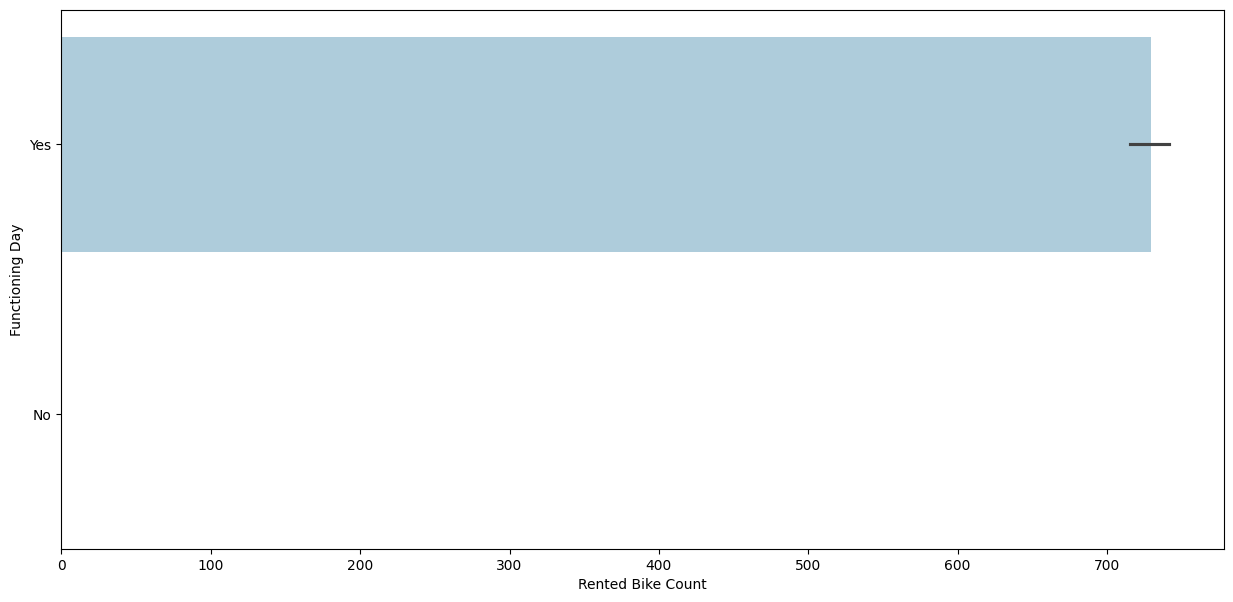

In [47]:
def barplots(x,y):
    plt.figure(figsize=(15,7))
    sns.set_palette("Paired")
    sns.barplot(x=x,y=y,data=df_brut);
barplots('Rented Bike Count','Functioning Day')

#### We can see that the rental bike in Seoul only works on functionning days, so the data on non functionning day is irrelevant : we can remove it. 
#### After removing it, the column functionning day will also become irrelevant so we can remove it too.

In [48]:
df=df_brut.drop(df_brut[df_brut['Functioning Day'] == 'No'].index) 
df=df.drop(['Functioning Day'], axis = 1)
df=df.drop(['Holiday'], axis=1)

df.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday,Hour_category,Temperature_category
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Late Night,Cold
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Late Night,Cold
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Late Night,Cold
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Late Night,Cold
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Late Night,Cold
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Early Morning,Cold
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Early Morning,Cold
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,...,12,2017,False,False,False,True,False,True,Early Morning,Cold
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,...,12,2017,False,False,False,True,False,True,Early Morning,Cold
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,...,12,2017,False,False,False,True,False,True,Morning,Cold


In [49]:
total_rows = df_brut.shape[0]
count = df_brut[df_brut['Functioning Day'] == 'No'].shape[0]
print("Number of columns we must have left ", total_rows - count)
print("Dataframe after removing non functionning day :",df.shape,"\n") 

Number of columns we must have left  8465
Dataframe after removing non functionning day : (8465, 23) 



In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   object 
 11  Functioning Day_Int        8465 non-null   int64  
 12  Day                        8465 non-null   int32  
 13  Month                      8465 non-null   int32  
 1

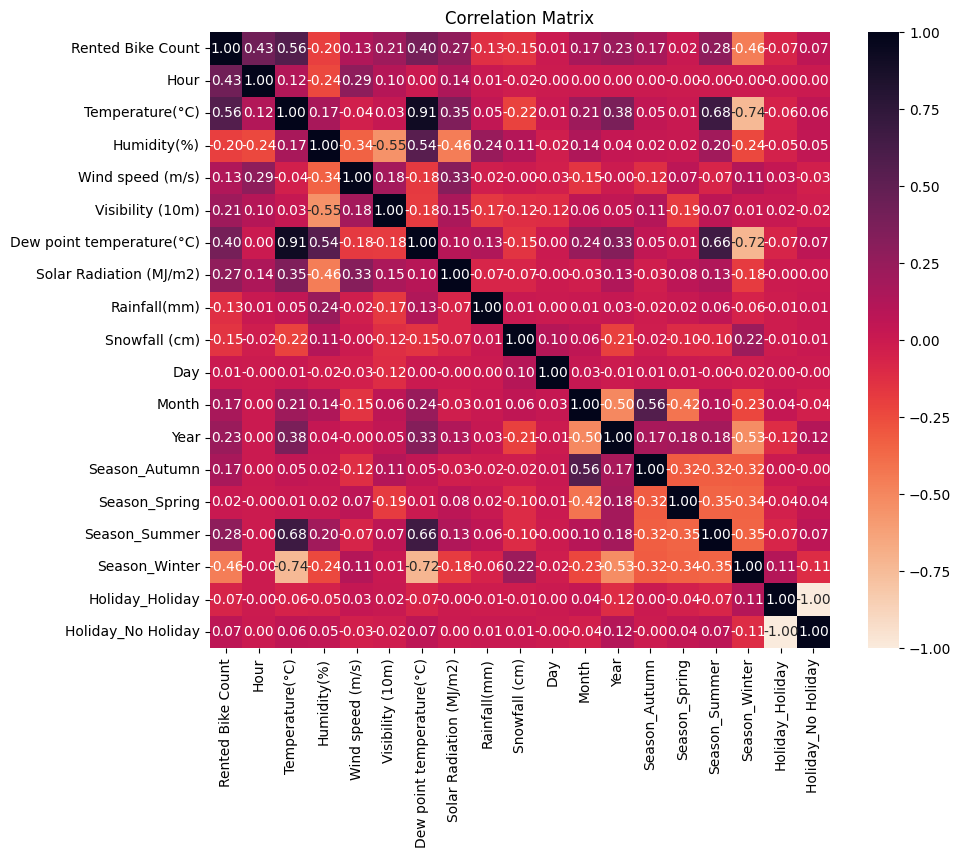

In [51]:
df=df.drop(['Functioning Day_Int'],axis=1)
correlation_matrix = df.drop(['Seasons','Hour_category','Temperature_category'],axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### We can observe that the number of rented bikes is influenced by the Temperature and Hour columns.
#### Also, the correlation map shows us that Temperature and Dew point temperature are 0.91 correlated, which can create issue and is irrelevant. So we can drop this column.

In [52]:
df=df.drop(['Dew point temperature(°C)'], axis = 1)


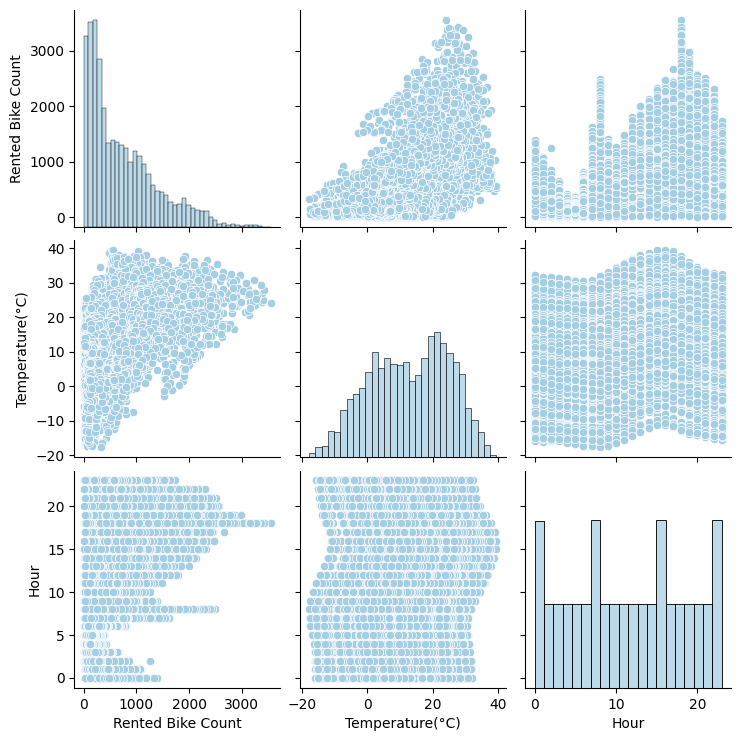

In [53]:
# Pairplot for selected numerical columns to visualize the relationships
# between Rented Bike Count, Temperature and Hour 
sns.pairplot(df[['Rented Bike Count', 'Temperature(°C)', 'Hour']])
plt.show()

# Data Visualization

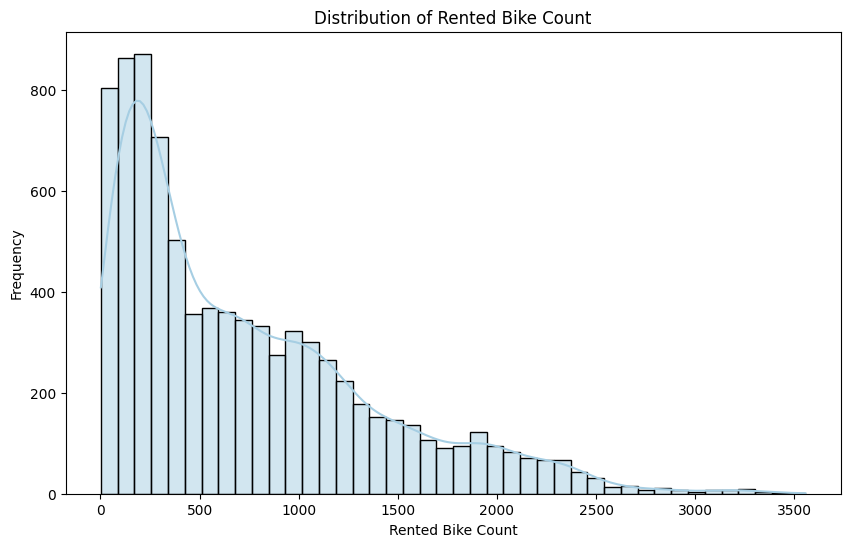

In [54]:
# Distribution of the Rented Bike count variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

#### This graph shows us the frequency of the number of bike rented. For example, we can see that it is very frequent to have between 0 and 400 bike rented counter to having more than 2500 bike rented

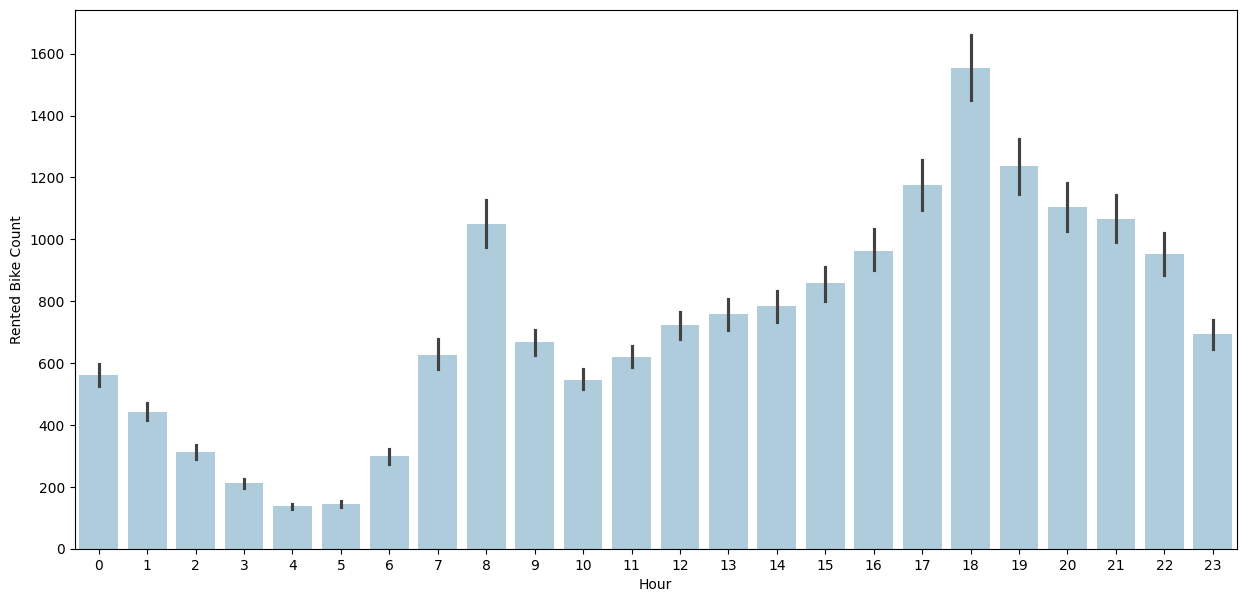

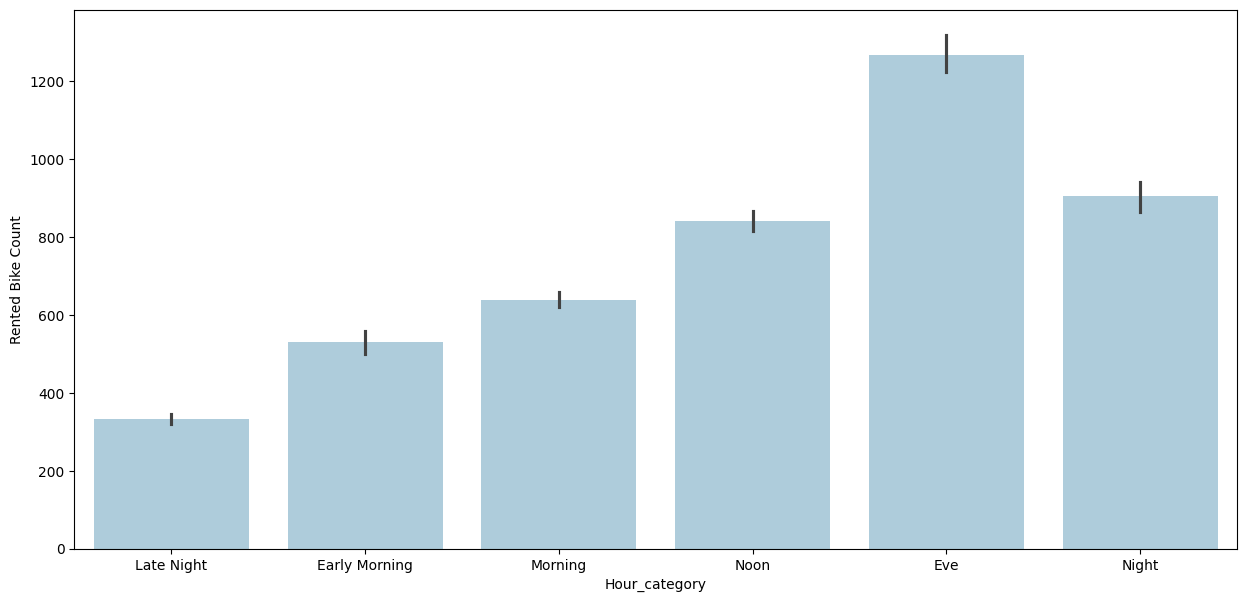

In [55]:
def barplots(x,y):
    plt.figure(figsize=(15,7))
    sns.set_palette("Paired")
    sns.barplot(x=x,y=y,data=df)
   
barplots('Hour','Rented Bike Count')
barplots('Hour_category','Rented Bike Count')

#### These graphs shows us that people tend to rent more bikes around eve's hours

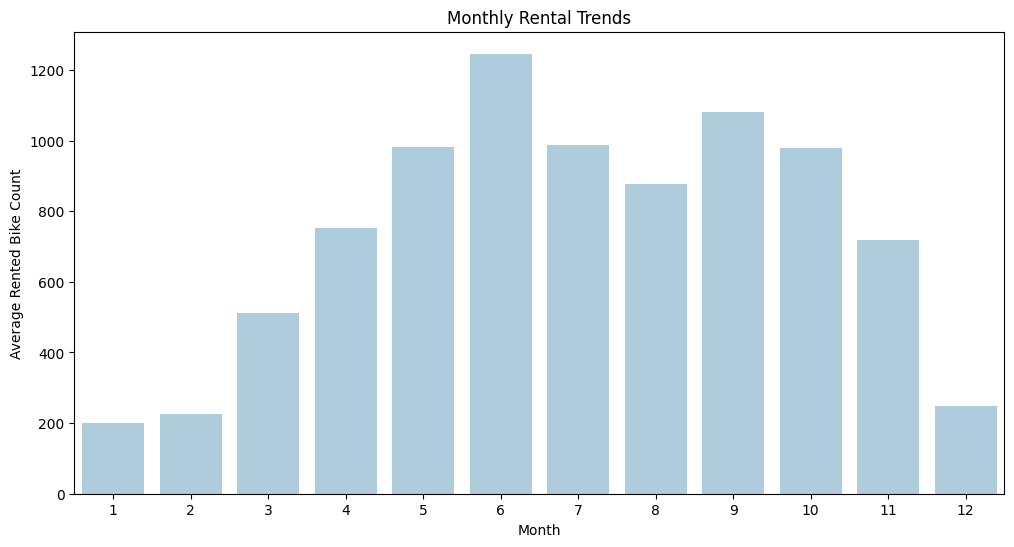

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="Rented Bike Count", data=df, errorbar=None)
plt.title('Monthly Rental Trends')
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.show()

##### We observe that the month with most rentals is June

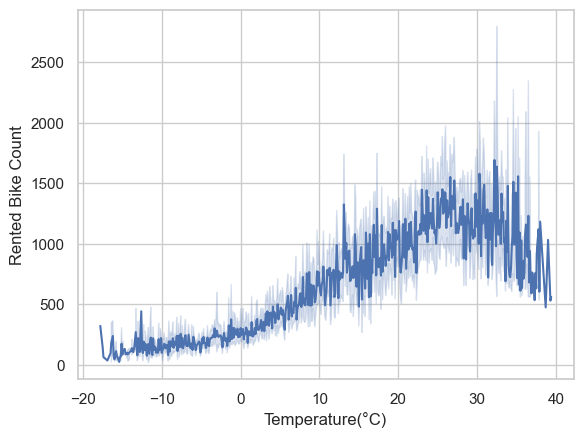

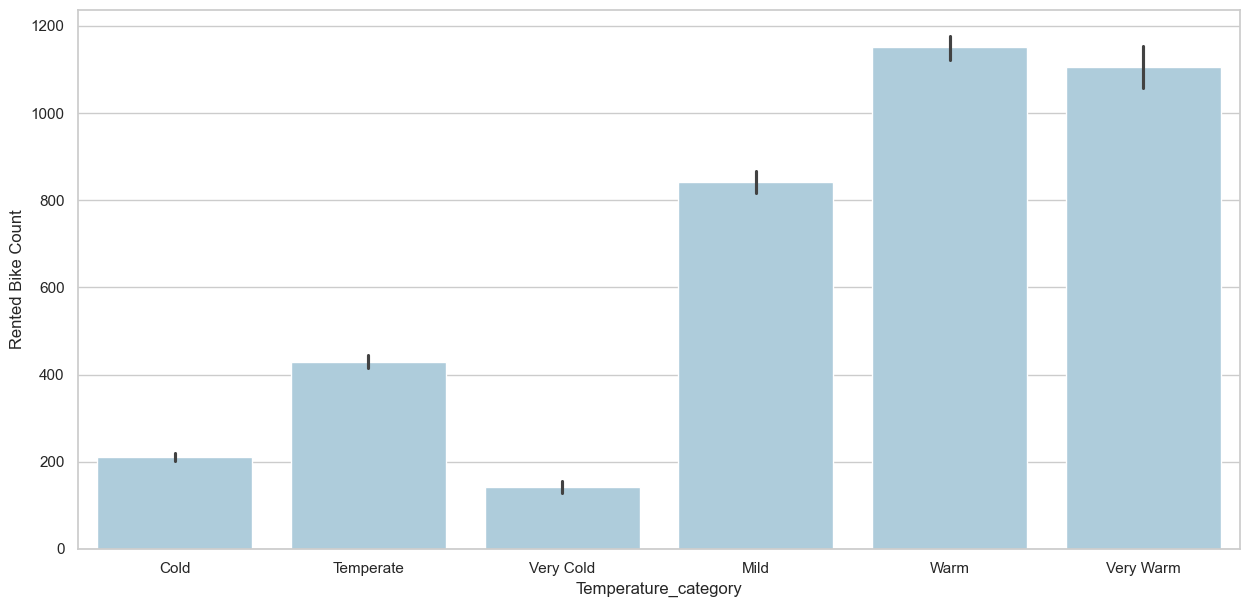

In [57]:
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, y="Rented Bike Count", x="Temperature(°C)")

barplots('Temperature_category','Rented Bike Count')

#### These graphs shows us that people tend to rent more bikes when temperature are warm

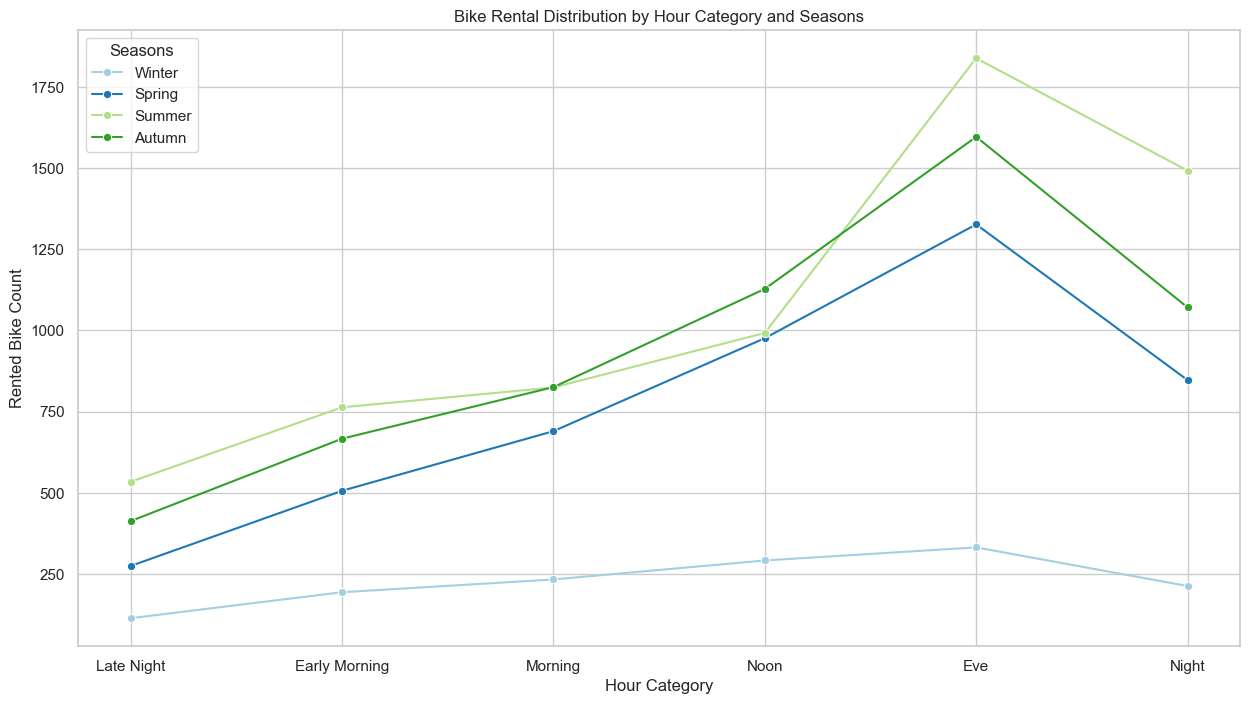

In [58]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Hour_category', y='Rented Bike Count', hue='Seasons', data=df, marker='o', errorbar=None)
plt.title('Bike Rental Distribution by Hour Category and Seasons')
plt.xlabel('Hour Category')
plt.ylabel('Rented Bike Count')
plt.show()

##### This graph shows the distribution of rented bike counts across different hour categories and by seasons. Each line represents a season. The graph provides a clear visual comparison of bike rental patterns during different times of the day for each season, and help us find potential trends and preferences.

#### These graphs shows us the repartition of bike rentals according to seasons and hours

In [59]:
df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()


,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


# Modeling

In [60]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)



In [61]:
def L_Pipeline(scaler, model):
    if scaler == "min-max":
        scaler = MinMaxScaler()
    elif scaler == "standard":
        scaler = StandardScaler()
    elif scaler == "RobustScaler":
        scaler = RobustScaler()
    
    my_pipeline = None
    
    if model == 'LinearRegression':
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('LinearRegression', LinearRegression())  
        ])
    elif model == "SGDRegressor":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('SGDRegressor', SGDRegressor())  
        ])
    elif model == "ElasticNet":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('ElasticNet', ElasticNet())
        ])
    elif model == "Ridge":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('Ridge', Ridge())
        ])
    elif model == "Lasso":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('Lasso', Lasso())
        ])
    elif model == "MLPRegressor":
            my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('MLPRegressor', MLPRegressor())
        ])
    elif model == "svm.SVR":
            my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('svm.SVR', svm.SVR())
        ])        
        
    elif model == "LinearSVR":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('LinearSVR', LinearSVR())
        ])
    elif model == "DecisionTreeRegressor":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('DecisionTreeRegressor', DecisionTreeRegressor())
        ])
    elif model == "NuSVR":
            my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('NuSVR', NuSVR())
            
        ])
    elif model == "ExtraTreeRegressor":
            my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('ExtraTreeRegressor', ExtraTreeRegressor())
        ])
    elif model == "GradientBoostingRegressor":
            my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('GradientBoostingRegressor', GradientBoostingRegressor())
        ])
    elif model == "LinearDiscriminantAnalysis":
        my_pipeline = Pipeline([
            ('scaler', scaler),  
            ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())
        ])
    
    return my_pipeline




In [64]:
X = df.drop(columns=['Rented Bike Count', 'Hour_category', 'Temperature_category', 'Seasons'])
Y = df["Rented Bike Count"]


Scaler: min-max, model: LinearDiscriminantAnalysis
R²=0.4195956265835974
The mean squared error (MSE) on test set: 477.3456
Root Mean Squared Error is 477.3456 


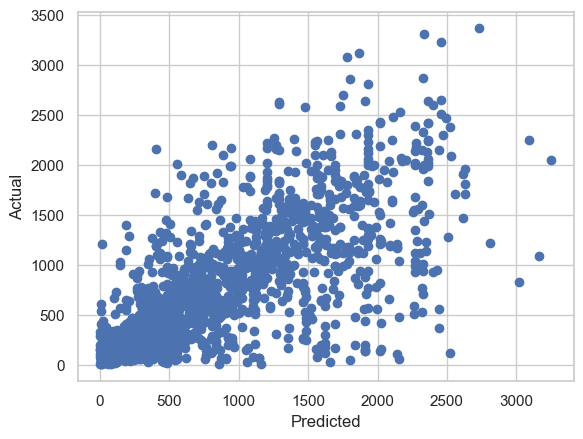

------
Scaler: min-max, model: svm.SVR
R²=0.2906204245415974
The mean squared error (MSE) on test set: 527.7241
Root Mean Squared Error is 527.7241 


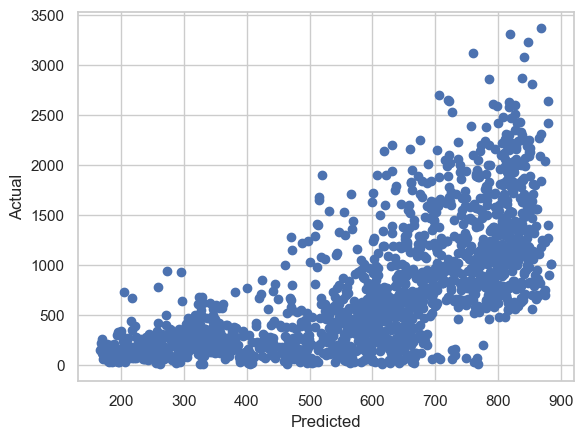

------
Scaler: min-max, model: NuSVR
R²=0.27470432174480985
The mean squared error (MSE) on test set: 533.6115
Root Mean Squared Error is 533.6115 


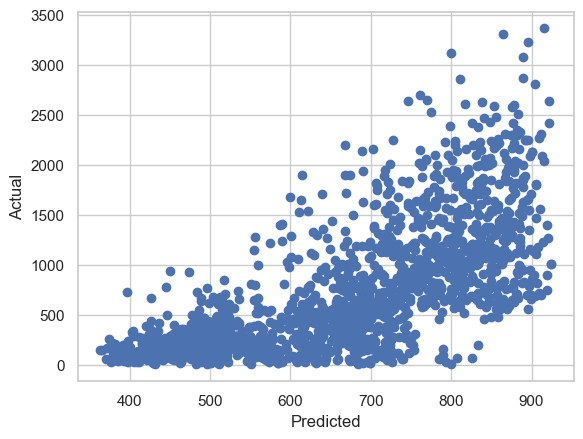

------
Scaler: min-max, model: LinearRegression
R²=0.5600733602903947
The mean squared error (MSE) on test set: 415.5830
Root Mean Squared Error is 415.5830 


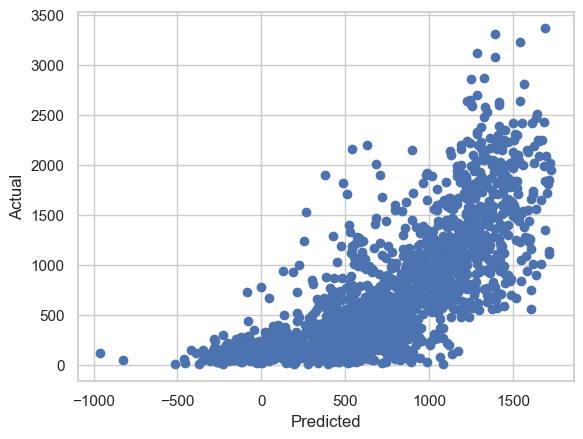

------
Scaler: min-max, model: MLPRegressor
R²=0.5503557562051895
The mean squared error (MSE) on test set: 420.1478
Root Mean Squared Error is 420.1478 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


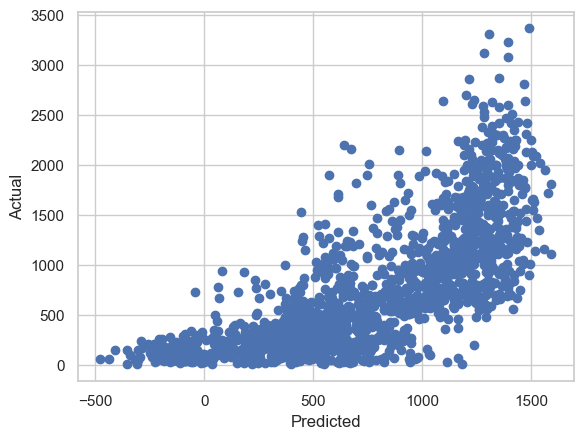

------
Scaler: min-max, model: ExtraTreeRegressor
R²=0.740721719621846
The mean squared error (MSE) on test set: 319.0441
Root Mean Squared Error is 319.0441 


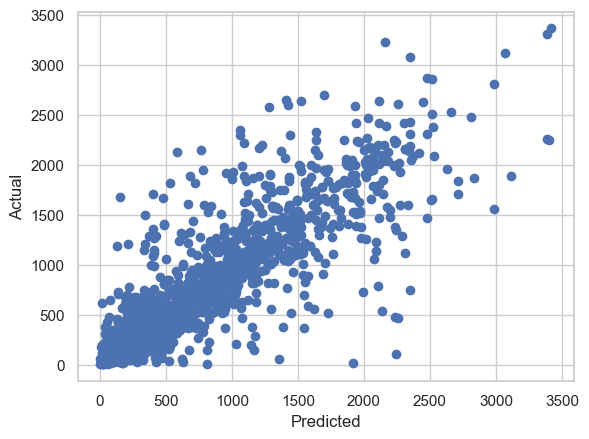

------
Scaler: min-max, model: SGDRegressor
R²=0.5549097743130145
The mean squared error (MSE) on test set: 418.0148
Root Mean Squared Error is 418.0148 


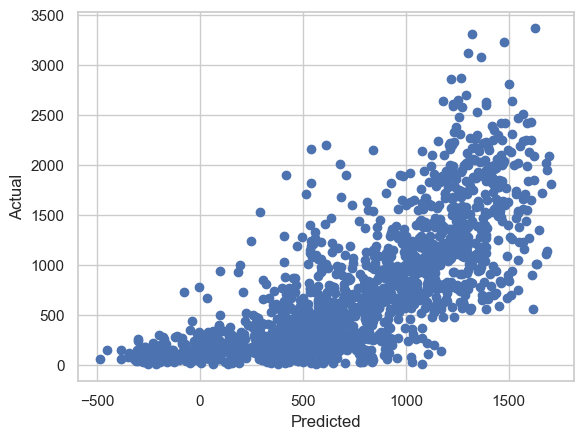

------
Scaler: min-max, model: Ridge
R²=0.5608087022098167
The mean squared error (MSE) on test set: 415.2355
Root Mean Squared Error is 415.2355 


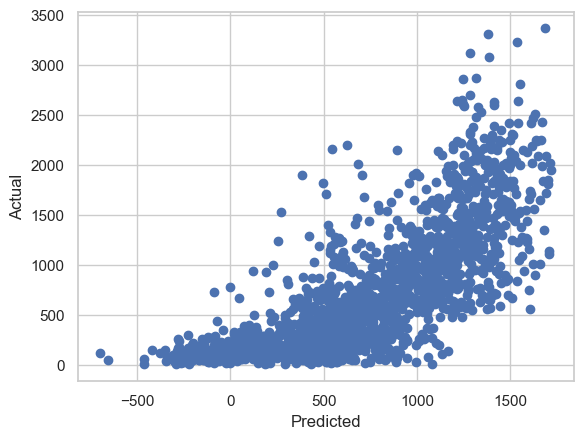

------
Scaler: min-max, model: GradientBoostingRegressor
R²=0.8507541677758725
The mean squared error (MSE) on test set: 242.0576
Root Mean Squared Error is 242.0576 


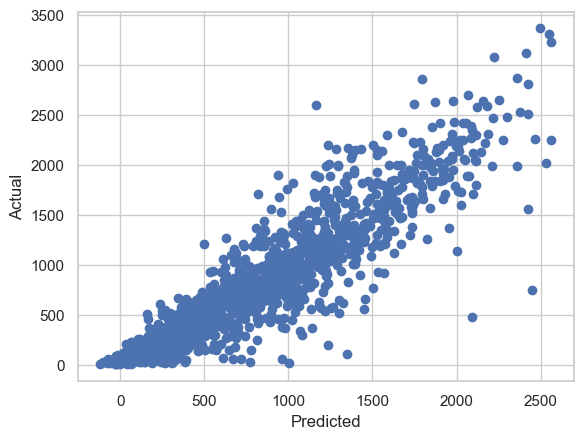

------
Scaler: min-max, model: ElasticNet
R²=0.25030249991781606
The mean squared error (MSE) on test set: 542.5136
Root Mean Squared Error is 542.5136 


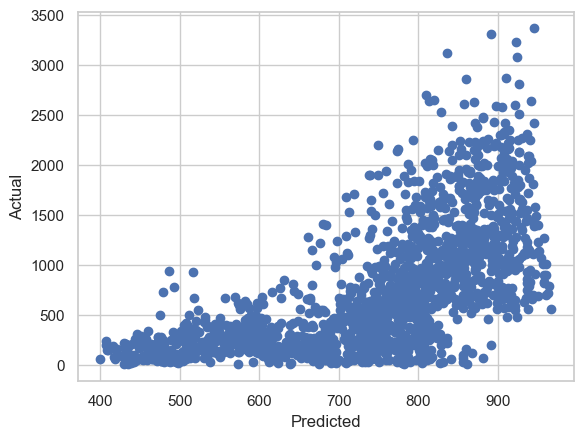

------
Scaler: min-max, model: LinearSVR
R²=0.40632863973345534
The mean squared error (MSE) on test set: 482.7704
Root Mean Squared Error is 482.7704 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


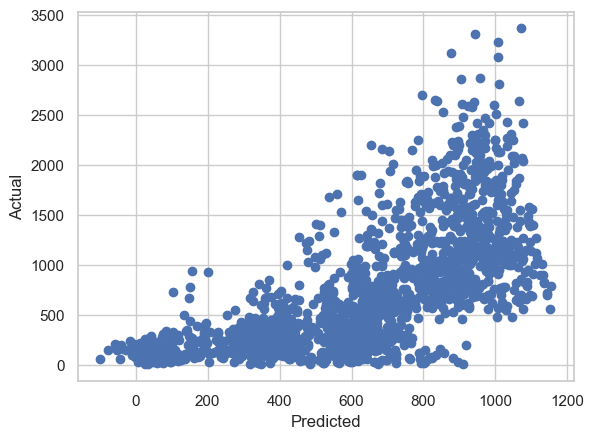

------
Scaler: min-max, model: DecisionTreeRegressor
R²=0.7739990548726043
The mean squared error (MSE) on test set: 297.8672
Root Mean Squared Error is 297.8672 


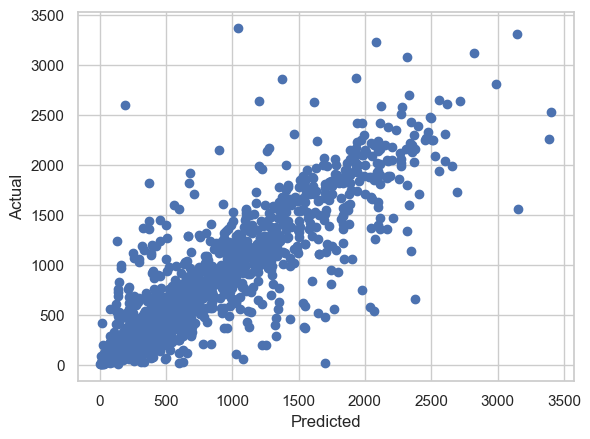

------
Scaler: min-max, model: Lasso
R²=0.5554203348609543
The mean squared error (MSE) on test set: 417.7750
Root Mean Squared Error is 417.7750 


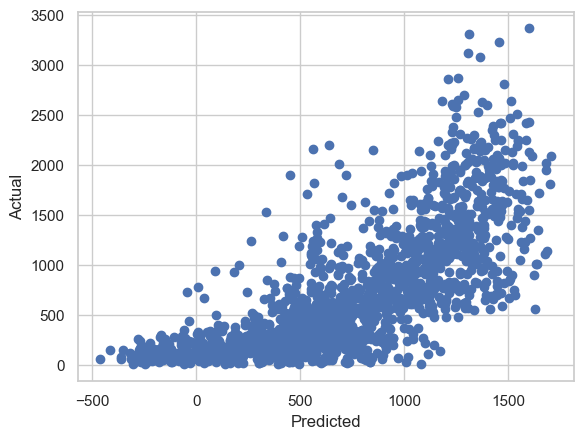

------
Scaler: standard, model: LinearDiscriminantAnalysis
R²=0.4195956265835974
The mean squared error (MSE) on test set: 477.3456
Root Mean Squared Error is 477.3456 


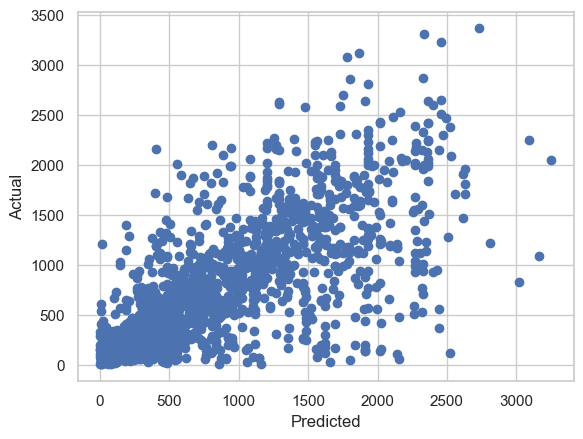

------
Scaler: standard, model: svm.SVR
R²=0.322660196003548
The mean squared error (MSE) on test set: 515.6689
Root Mean Squared Error is 515.6689 


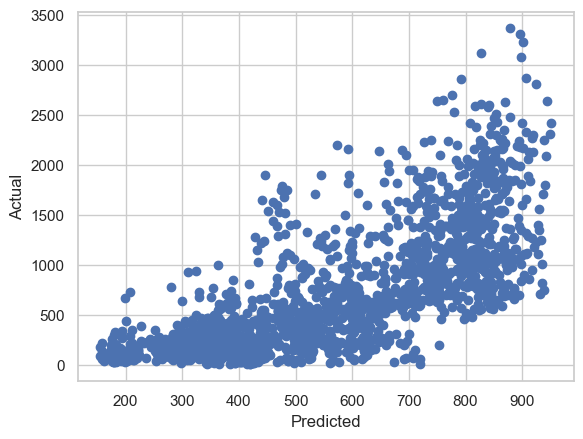

------
Scaler: standard, model: NuSVR
R²=0.30529110076175314
The mean squared error (MSE) on test set: 522.2387
Root Mean Squared Error is 522.2387 


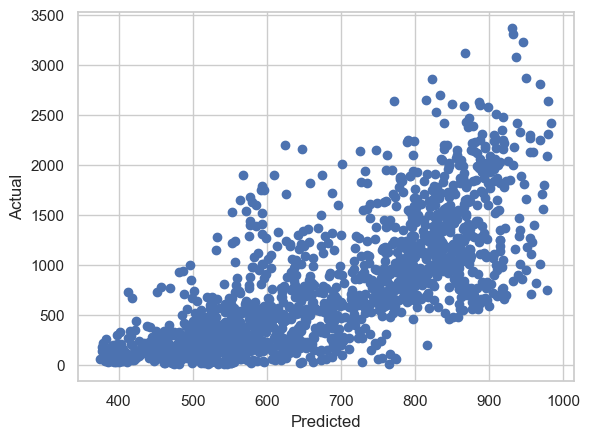

------
Scaler: standard, model: LinearRegression
R²=0.5600733602903947
The mean squared error (MSE) on test set: 415.5830
Root Mean Squared Error is 415.5830 


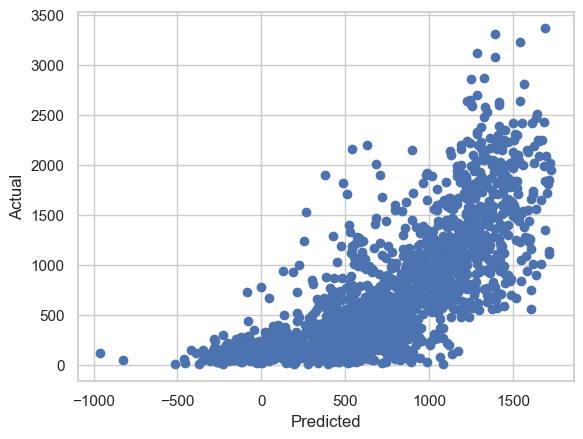

------
Scaler: standard, model: MLPRegressor
R²=0.670176666604235
The mean squared error (MSE) on test set: 359.8391
Root Mean Squared Error is 359.8391 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


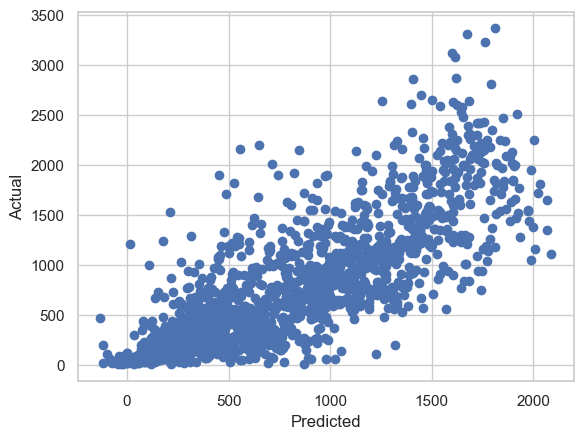

------
Scaler: standard, model: ExtraTreeRegressor
R²=0.7451187987840866
The mean squared error (MSE) on test set: 316.3272
Root Mean Squared Error is 316.3272 


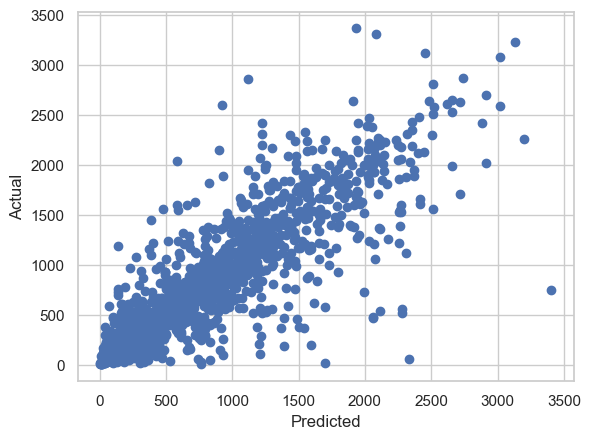

------
Scaler: standard, model: SGDRegressor
R²=0.5597483714440563
The mean squared error (MSE) on test set: 415.7364
Root Mean Squared Error is 415.7364 


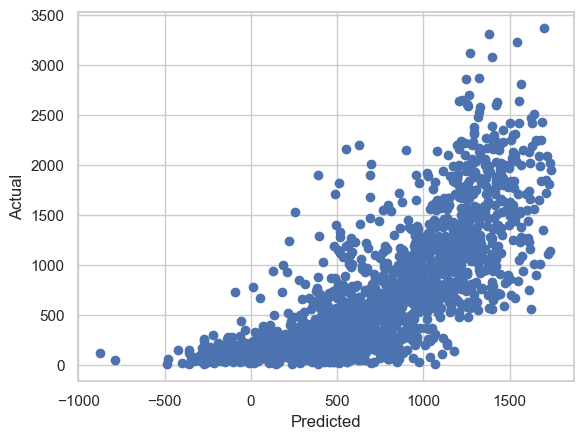

------
Scaler: standard, model: Ridge
R²=0.5600924216264888
The mean squared error (MSE) on test set: 415.5740
Root Mean Squared Error is 415.5740 


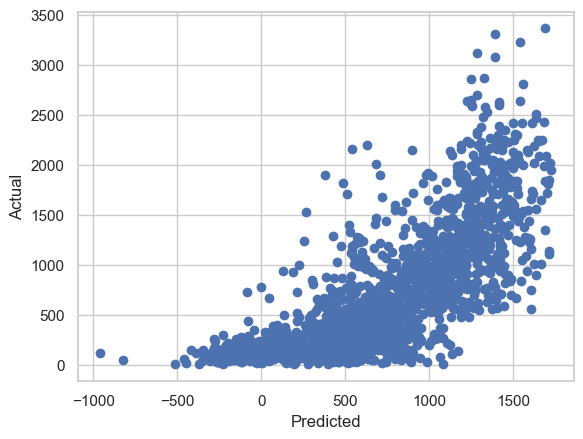

------
Scaler: standard, model: GradientBoostingRegressor
R²=0.8507864741750104
The mean squared error (MSE) on test set: 242.0314
Root Mean Squared Error is 242.0314 


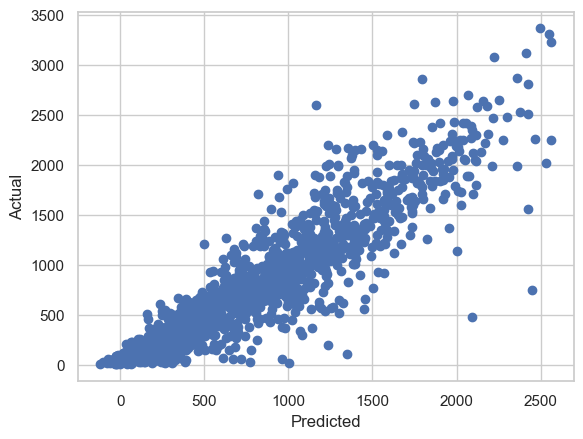

------
Scaler: standard, model: ElasticNet
R²=0.5179460579591053
The mean squared error (MSE) on test set: 435.0262
Root Mean Squared Error is 435.0262 


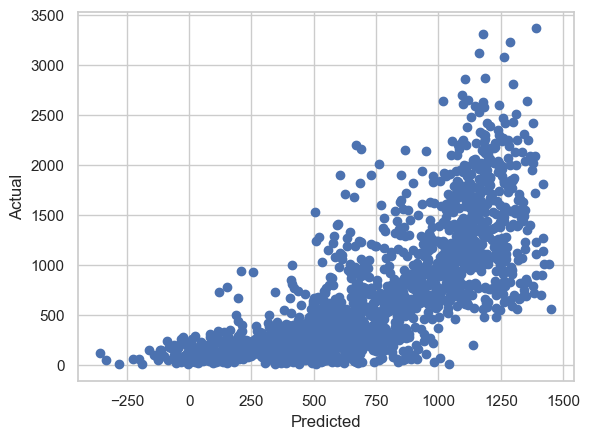

------
Scaler: standard, model: LinearSVR
R²=0.4938280285392239
The mean squared error (MSE) on test set: 445.7760
Root Mean Squared Error is 445.7760 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


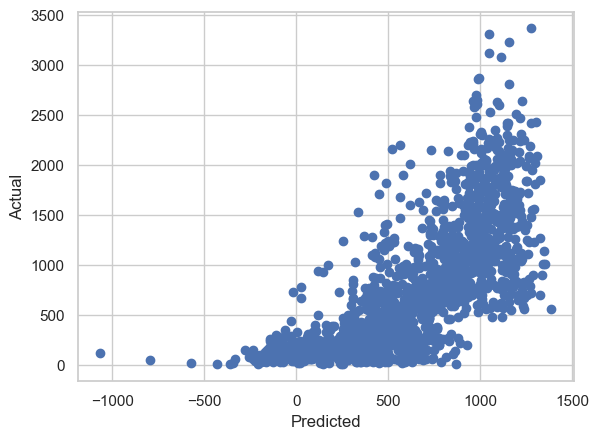

------
Scaler: standard, model: DecisionTreeRegressor
R²=0.7827367578104357
The mean squared error (MSE) on test set: 292.0524
Root Mean Squared Error is 292.0524 


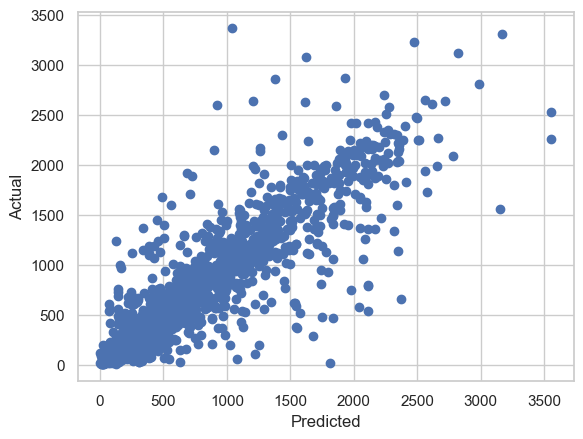

------
Scaler: standard, model: Lasso
R²=0.5600070224610894
The mean squared error (MSE) on test set: 415.6143
Root Mean Squared Error is 415.6143 


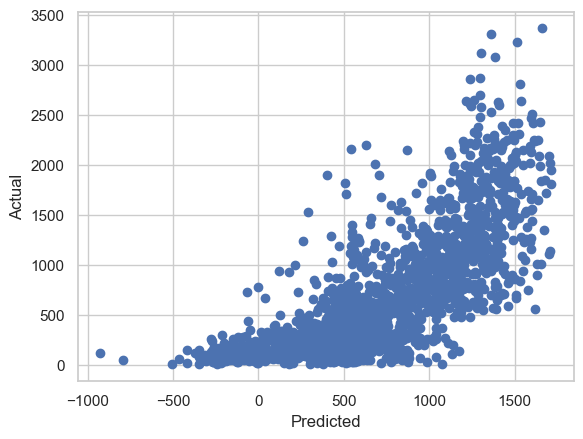

------
Scaler: RobustScaler, model: LinearDiscriminantAnalysis
R²=0.4195956265835974
The mean squared error (MSE) on test set: 477.3456
Root Mean Squared Error is 477.3456 


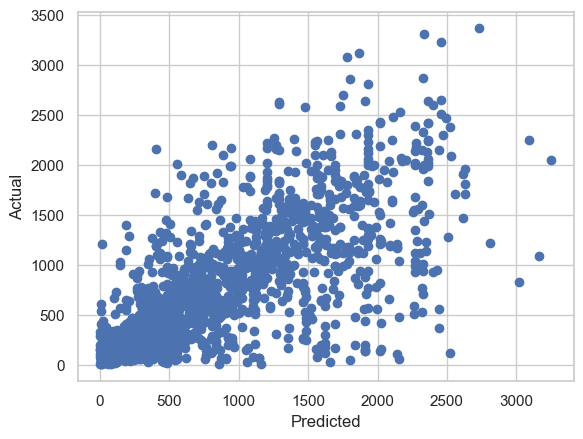

------
Scaler: RobustScaler, model: svm.SVR
R²=0.3221991455911719
The mean squared error (MSE) on test set: 515.8443
Root Mean Squared Error is 515.8443 


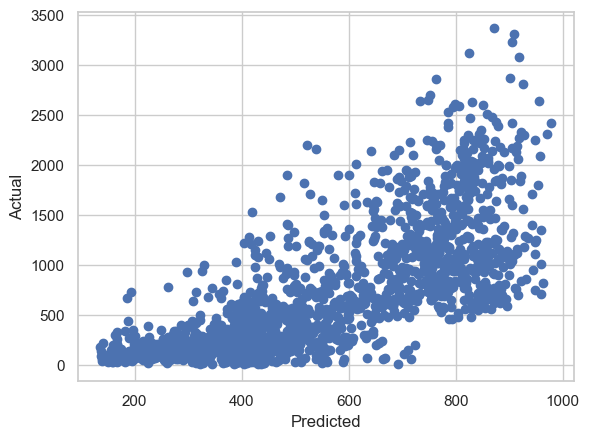

------
Scaler: RobustScaler, model: NuSVR
R²=0.3136161221096051
The mean squared error (MSE) on test set: 519.1001
Root Mean Squared Error is 519.1001 


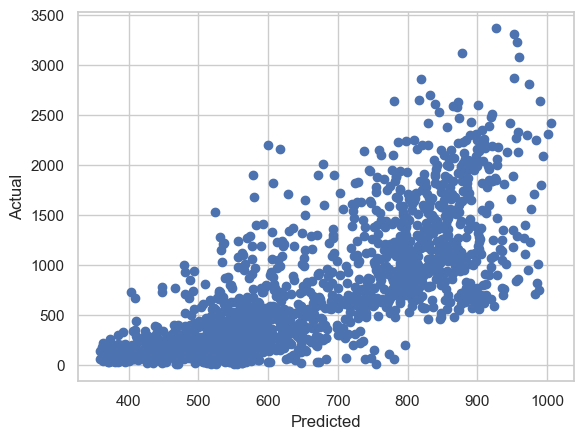

------
Scaler: RobustScaler, model: LinearRegression
R²=0.5600733602903945
The mean squared error (MSE) on test set: 415.5830
Root Mean Squared Error is 415.5830 


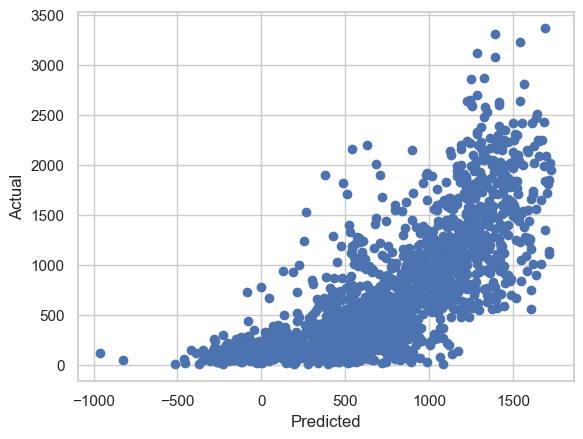

------
Scaler: RobustScaler, model: MLPRegressor
R²=0.6642058987702656
The mean squared error (MSE) on test set: 363.0815
Root Mean Squared Error is 363.0815 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


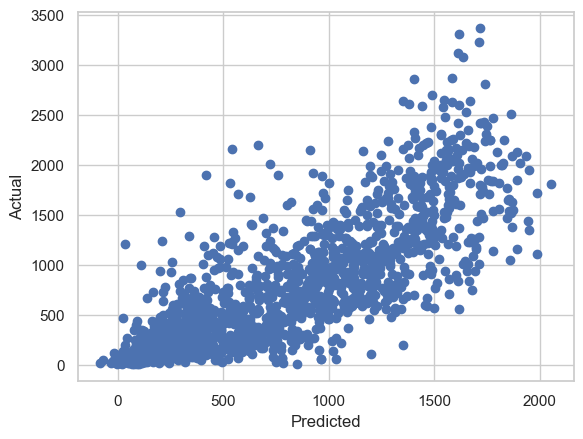

------
Scaler: RobustScaler, model: ExtraTreeRegressor
R²=0.7731180255562491
The mean squared error (MSE) on test set: 298.4473
Root Mean Squared Error is 298.4473 


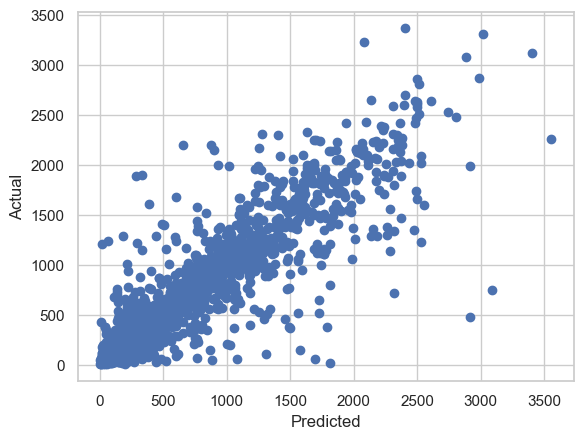

------
Scaler: RobustScaler, model: SGDRegressor
R²=0.558376236021574
The mean squared error (MSE) on test set: 416.3838
Root Mean Squared Error is 416.3838 


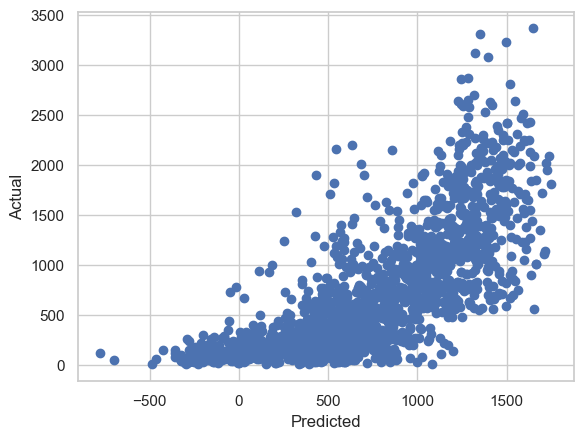

------
Scaler: RobustScaler, model: Ridge
R²=0.5601472255734232
The mean squared error (MSE) on test set: 415.5481
Root Mean Squared Error is 415.5481 


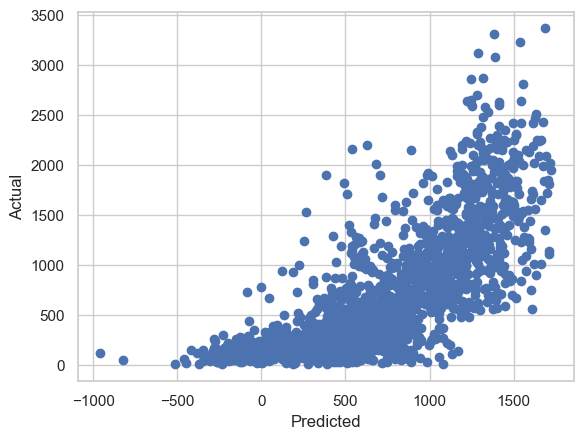

------
Scaler: RobustScaler, model: GradientBoostingRegressor
R²=0.8507541677758725
The mean squared error (MSE) on test set: 242.0576
Root Mean Squared Error is 242.0576 


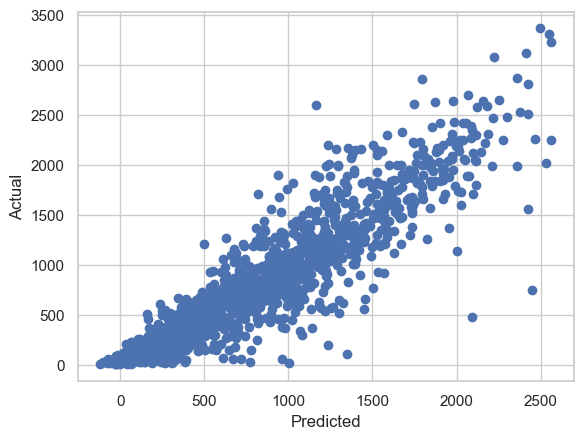

------
Scaler: RobustScaler, model: ElasticNet
R²=0.43324349397235407
The mean squared error (MSE) on test set: 471.7000
Root Mean Squared Error is 471.7000 


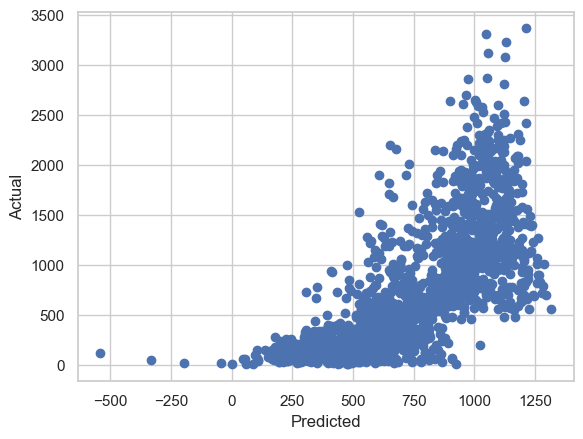

------
Scaler: RobustScaler, model: LinearSVR
R²=0.45646642854528885
The mean squared error (MSE) on test set: 461.9349
Root Mean Squared Error is 461.9349 


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


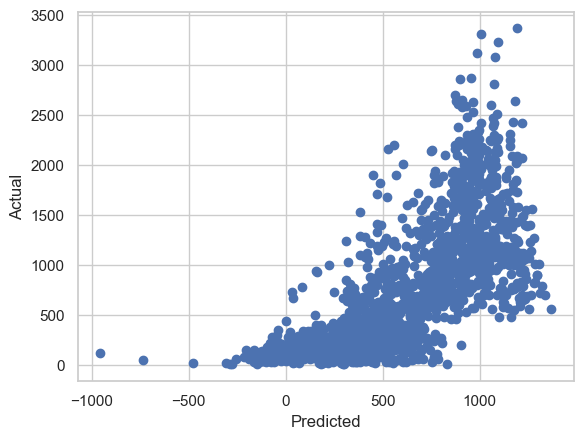

------
Scaler: RobustScaler, model: DecisionTreeRegressor
R²=0.7635602307556271
The mean squared error (MSE) on test set: 304.6687
Root Mean Squared Error is 304.6687 


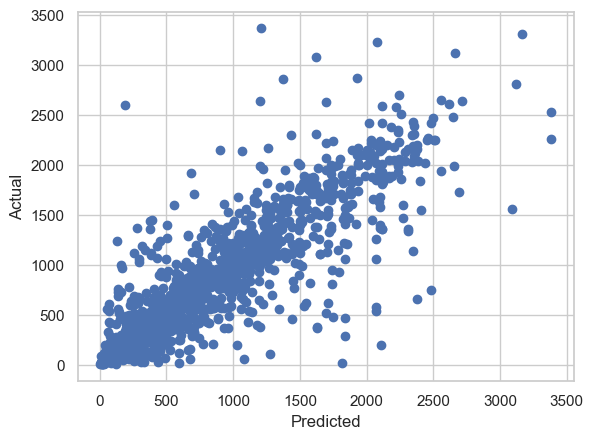

------
Scaler: RobustScaler, model: Lasso
R²=0.5578010008747074
The mean squared error (MSE) on test set: 416.6549
Root Mean Squared Error is 416.6549 


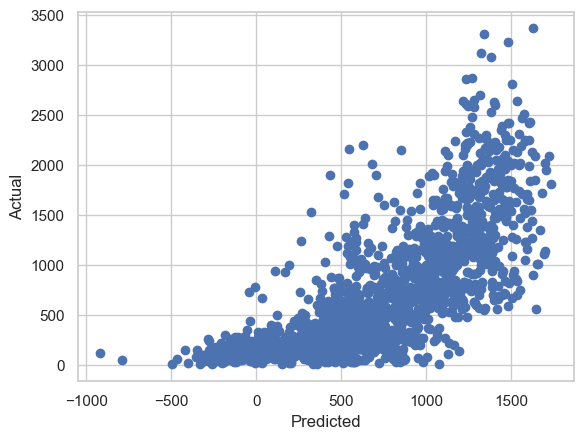

------
Meilleur modèle est scaler: standard, model: GradientBoostingRegressor, r2 = 0.8507864741750104, mse = 242.03139327324445 


In [65]:
scalers = ["min-max", "standard","RobustScaler"]
models=["LinearDiscriminantAnalysis","svm.SVR","NuSVR","LinearRegression","MLPRegressor","ExtraTreeRegressor","SGDRegressor","Ridge","GradientBoostingRegressor","ElasticNet","LinearSVR","DecisionTreeRegressor","Lasso"]
i=-1
v=np.inf
result = [0,0,0,0]
for scaler_type in scalers:
    for model in models:
        
        my_pipeline = L_Pipeline(scaler_type,model)
        
        
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        
        score= my_pipeline.fit(x_train, y_train).score(x_test,y_test)
        
        
        y_pred = my_pipeline.predict(x_test)
        
        
        r2 = r2_score(y_test, y_pred)
        mse =np.sqrt (mean_squared_error(y_test,y_pred))
        if score>i and mse<v  : 
            i=score
            v=mse
            result[0]=scaler_type
            result[1]=model
            result[2]=score
            result[3]=mse
        print(f"Scaler: {scaler_type}, model: {model}")
        print(f"R²={r2}")
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
        print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    y_pred) )))
        
        plt.scatter(y_pred,y_test,color='b')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        print("------")
        
print(f"Meilleur modèle est scaler: {result[0]}, model: {result[1]}, r2 = {result[2]}, mse = {result[3]} ")



Model Accuracy: 0.851
The mean squared error (MSE) on test set: 58591.4649
Root Mean Squared Error is 242.0567 


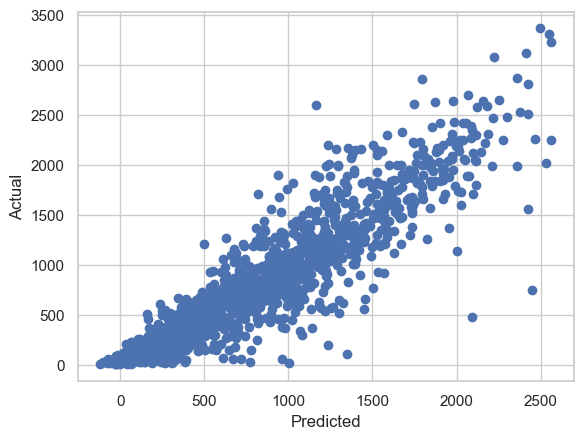

'min-max, model: GradientBoostingRegressor'

In [66]:
best_scaler=MinMaxScaler()
gbr=GradientBoostingRegressor()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=best_scaler.fit_transform(x_train)
x_test=best_scaler.transform(x_test)

best_model=gbr.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
print("Model Accuracy: %.3f" % gbr.score(x_test, y_test))


# Create the mean squared error

mse = mean_squared_error(y_test, gbr.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    y_pred) )))

plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
"""min-max, model: GradientBoostingRegressor"""

##### So we chose GradientBoostingRegressor with MinMax

***Finetuning our model***

##### Cross-Validation

0.8522662890874211
0.8522655138253323
0.8523040039088968
0.8522912220054237


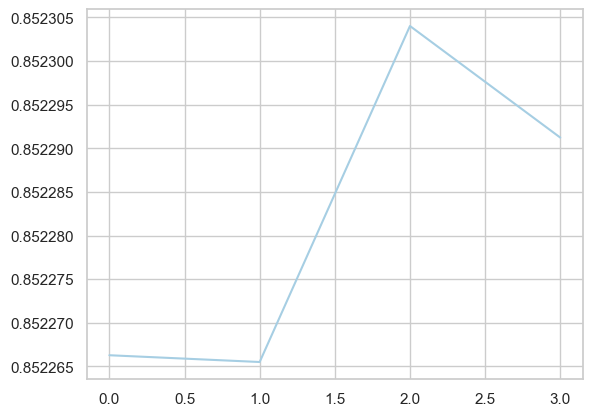

In [67]:
val_score=[]
for k in range(1,5):
    score=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=5,scoring='r2').mean()
    print(score)
    val_score.append(score)
plt.plot(val_score)

This code performs an analysis of a Gradient Boosting Regressor's performance by varying the number of estimators and observing the corresponding R-squared scores. The loop iterates from 1 to 4, training the model each time and calculating the mean R-squared score.

##### Validation Curve

Maximum value : 0.8773364252251424
Reach when n_estimator = 1100


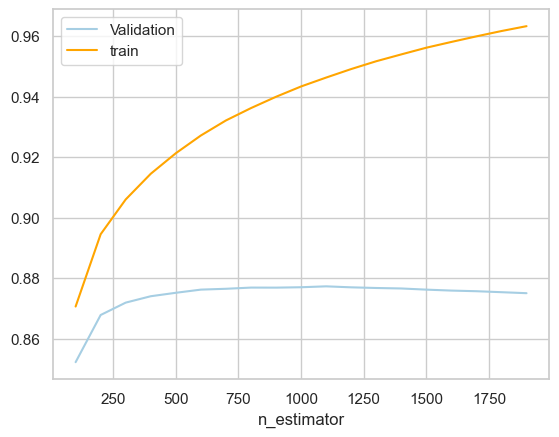

In [68]:
from sklearn.model_selection import validation_curve
k=np.arange(100,2000,100)
model=GradientBoostingRegressor()
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), x_train, y_train, param_name="n_estimators", param_range=k,
    cv=5, scoring="r2", n_jobs=-1) #n_jobs=-1 : utiliser tous les coeurs
plt.plot(k,test_scores.mean(axis=1),label='Validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_estimator')
plt.legend()

max_val_score = np.max(test_scores.mean(axis=1))
max_val_index = np.argmax(test_scores.mean(axis=1))
corresponding_n_estimators = k[max_val_index]

print(f"Maximum value : {max_val_score}")
print(f"Reach when n_estimator = {corresponding_n_estimators}")


Increasing n_estimators (the number of estimators in the model) tends to increase the performance scores on both the training (train) and validation (validation) sets until a certain point.
However, it's important to note that excessive increments in n_estimators can lead to overfitting on the training set, potentially reducing performance on the validation set.


The performance of a model significantly depends on the value of hyperparameters. Let's see if R^2 will improve if we change more parameters


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[250,500,1000],
    'learning_rate': [0.1,0.05,0.01],
    'max_depth':[2,4,6],
    'loss' :['squared_error', 'huber', 'quantile']
}
grid=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['squared_error', 'huber', 'quantile'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [250, 500, 1000]})

In [70]:
grid.best_score_

0.8907613157585

In [71]:
grid.best_params_

{'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'n_estimators': 1000}

In [72]:
model=grid.best_estimator_
model

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=6,
                          n_estimators=1000)

In [73]:
predictions = model.predict(x_test)
(predictions)

array([1354.75459586,  986.2337932 ,  969.92936024, ...,  103.23409056,
       1238.62377407, 1798.9243503 ])

### Results

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(r2_score(model.predict(x_test), y_pred))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,predictions))))

      

0.9492703146226318
Root Mean Squared Error is 213.8865 


Learning Curve to define the optimal train size

#### We plot our model learning performance over experience and we try to determine the best train_size value

[ 541 1083 1625 2166 2708 3250 3791 4333 4875 5417]
Maximum value : 0.8902050870987308
Reach when trainin_size = 4875


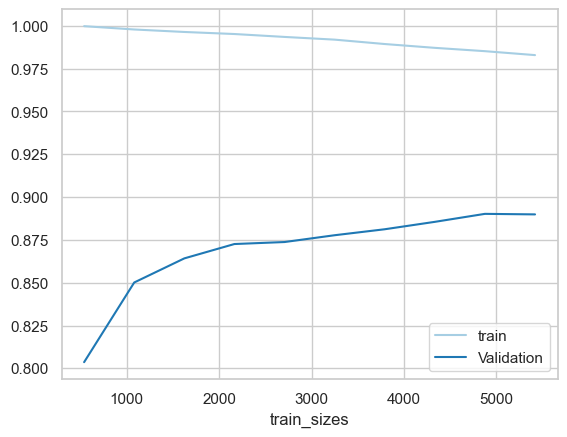

In [75]:
from sklearn.model_selection import learning_curve
N, train_scores,val_scores=learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=5,n_jobs=-1)
print(N)
plt.plot(N,train_scores.mean(axis=1), label='train')
plt.plot(N,val_scores.mean(axis=1),label='Validation')
plt.xlabel('train_sizes')
plt.legend()

max_val_score = np.max(val_scores.mean(axis=1))
max_val_index = np.argmax(val_scores.mean(axis=1))
corresponding_train_size = N[max_val_index]

print(f"Maximum value : {max_val_score}")
print(f"Reach when trainin_size = {corresponding_train_size}")


Good model fit: Achieving an accuracy of 0.88

Possibility of overfitting: The score is 0.88 and seems to stabilize, it's possible that the model is at the threshold of overfitting. This means it performs well on the training data but might struggle to generalize to new data.

Performance limit: Reaching an accuracy of 0.88 might also indicate that the model has reached its performance limit for these specific data.

So we set test_size=0.36 (=1-(5417/8465))

Now we apply best selected hyperperameters and we check results



In [77]:
X = df.drop(columns=['Rented Bike Count', 'Hour_category', 'Temperature_category', 'Seasons'])
Y = df["Rented Bike Count"]

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.36)
mn=MinMaxScaler()
x_train=mn.fit_transform(x_train)
x_test=mn.transform(x_test)


# mdel = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=6, n_estimators=1000)
model.fit(x_train,y_train)
print("Model Accuracy: %.3f" % model.score(x_test, y_test))
mse = mean_squared_error(y_test, model.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,model.predict(x_test)))))

Model Accuracy: 0.891
The mean squared error (MSE) on test set: 44523.1367
Root Mean Squared Error is 211.0051 


#### Using Hyperperameters tuning, we improved accuracy of the model from 85% to 89%

Model Accuracy: 0.891
The mean squared error (MSE) on test set: 44259.4573
Root Mean Squared Error is 210.3793 


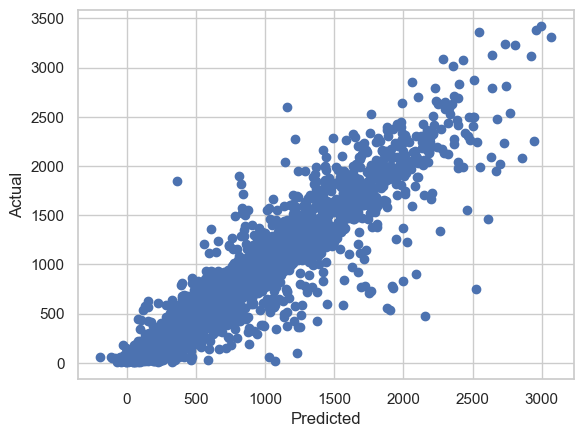

In [78]:
X = df.drop(columns=['Rented Bike Count', 'Hour_category', 'Temperature_category', 'Seasons'])
Y = df["Rented Bike Count"]
model = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=6, n_estimators=1000)

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.36)
mn=MinMaxScaler()
x_train=mn.fit_transform(x_train)
x_test=mn.transform(x_test)


model.fit(x_train,y_train)
print("Model Accuracy: %.3f" % model.score(x_test, y_test))
mse = mean_squared_error(y_test, model.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,model.predict(x_test)))))
plt.scatter(model.predict(x_test),y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()